In [1]:
import tensorflow as tf
from time import gmtime, strftime

from attention_dynamic_model import AttentionDynamicModel, set_decode_type
from reinforce_baseline import RolloutBaseline
from train import train_model

from utils import create_data_on_disk, get_cur_time

# Params of model
SAMPLES = 1280000 # 128*10000
BATCH = 128
START_EPOCH = 0
END_EPOCH = 40
FROM_CHECKPOINT = False
embedding_dim = 128
LEARNING_RATE = 0.0001
ROLLOUT_SAMPLES = 10000
NUMBER_OF_WP_EPOCHS = 1
GRAD_NORM_CLIPPING = 1.0
BATCH_VERBOSE = 5000
VAL_BATCH_SIZE = 1000
VALIDATE_SET_SIZE = 10000
SEED = 1234
GRAPH_SIZE = 20
FILENAME = 'VRP_{}_{}'.format(GRAPH_SIZE, strftime("%Y-%m-%d", gmtime()))


# Initialize model
model_tf = AttentionDynamicModel(embedding_dim) #n_encode_layers=3
set_decode_type(model_tf, "sampling")
print(get_cur_time(), 'model initialized')

# Create and save validation dataset
validation_dataset = create_data_on_disk(GRAPH_SIZE,
                                         VALIDATE_SET_SIZE,
                                         is_save=True,
                                         filename=FILENAME,
                                         is_return=True,
                                         seed = SEED)
print(get_cur_time(), 'validation dataset created and saved on the disk')

# Initialize optimizer
optimizer = tf.keras.optimizers.Adam(LEARNING_RATE)

# Initialize baseline
baseline = RolloutBaseline(model_tf,
                           wp_n_epochs = NUMBER_OF_WP_EPOCHS,
                           epoch = 0,
                           num_samples=ROLLOUT_SAMPLES,
                           filename = FILENAME,
                           from_checkpoint = FROM_CHECKPOINT,
                           embedding_dim=embedding_dim,
                           graph_size=GRAPH_SIZE
                           )
print(get_cur_time(), 'baseline initialized')

train_model(optimizer,
            model_tf,
            baseline,
            validation_dataset,
            samples = SAMPLES,
            batch = BATCH,
            val_batch_size = VAL_BATCH_SIZE,
            start_epoch = START_EPOCH,
            end_epoch = END_EPOCH,
            from_checkpoint = FROM_CHECKPOINT,
            grad_norm_clipping = GRAD_NORM_CLIPPING,
            batch_verbose = BATCH_VERBOSE,
            graph_size = GRAPH_SIZE,
            filename = FILENAME
            )

2020-06-13 04:32:28 model initialized
2020-06-13 04:32:30 validation dataset created and saved on the disk


Rollout greedy execution: 0it [00:00, ?it/s]

Evaluating baseline model on baseline dataset (epoch = 0)


Rollout greedy execution: 10it [00:08,  1.19it/s]


2020-06-13 04:32:41 baseline initialized
Current decode type: sampling


batch calculation at epoch 0: 1it [00:00,  1.09it/s]

grad_global_norm = 7.859330177307129, clipped_norm = 1.0
Epoch 0 (batch = 0): Loss: -0.9055688381195068: Cost: 13.063246726989746


batch calculation at epoch 0: 5001it [51:48,  1.66it/s]

grad_global_norm = 11.479528427124023, clipped_norm = 1.0
Epoch 0 (batch = 5000): Loss: -0.20812128484249115: Cost: 7.6359429359436035


batch calculation at epoch 0: 10000it [1:44:59,  1.59it/s]
Rollout greedy execution: 0it [00:00, ?it/s]

Evaluating candidate model on baseline dataset (callback epoch = 0)


Rollout greedy execution: 10it [00:04,  2.05it/s]


Epoch 0 candidate mean 6.845129013061523, baseline epoch 0 mean 12.700034141540527, difference -5.854905128479004
p-value: 0.0
Update baseline


Rollout greedy execution: 0it [00:00, ?it/s]

Evaluating baseline model on baseline dataset (epoch = 0)


Rollout greedy execution: 10it [00:04,  2.01it/s]
Rollout greedy execution: 0it [00:00, ?it/s]

alpha was updated to 1.0


Rollout greedy execution: 10it [00:04,  2.03it/s]


Validation score: 6.8653998374938965
2020-06-13 06:22:39 Epoch 0: Loss: -0.24691501259803772: Cost: 7.325963973999023


Rollout greedy execution: 625it [07:41,  1.35it/s]


Current decode type: sampling


batch calculation at epoch 1: 1it [00:00,  1.31it/s]

grad_global_norm = 7.536728858947754, clipped_norm = 1.0
Epoch 1 (batch = 0): Loss: -0.588096022605896: Cost: 6.932309150695801


batch calculation at epoch 1: 5001it [51:23,  1.71it/s]

grad_global_norm = 8.744220733642578, clipped_norm = 1.0
Epoch 1 (batch = 5000): Loss: 0.24558503925800323: Cost: 6.745438575744629


batch calculation at epoch 1: 10000it [1:42:20,  1.63it/s]
Rollout greedy execution: 0it [00:00, ?it/s]

Evaluating candidate model on baseline dataset (callback epoch = 1)


Rollout greedy execution: 10it [00:04,  2.22it/s]


Epoch 1 candidate mean 6.607793807983398, baseline epoch 1 mean 6.858460903167725, difference -0.25066709518432617
p-value: 0.0
Update baseline


Rollout greedy execution: 0it [00:00, ?it/s]

Evaluating baseline model on baseline dataset (epoch = 1)


Rollout greedy execution: 10it [00:04,  2.23it/s]
Rollout greedy execution: 10it [00:04,  2.24it/s]


Validation score: 6.61460018157959
2020-06-13 08:17:38 Epoch 1: Loss: 0.3695981800556183: Cost: 6.707436561584473


Rollout greedy execution: 625it [06:49,  1.53it/s]


Current decode type: sampling


batch calculation at epoch 2: 1it [00:00,  1.68it/s]

grad_global_norm = 4.987745761871338, clipped_norm = 0.9999999403953552
Epoch 2 (batch = 0): Loss: -0.2068687528371811: Cost: 6.651021957397461


batch calculation at epoch 2: 5001it [50:55,  1.73it/s]

grad_global_norm = 8.162467002868652, clipped_norm = 1.0
Epoch 2 (batch = 5000): Loss: -0.20006611943244934: Cost: 6.616608142852783


batch calculation at epoch 2: 10000it [1:41:36,  1.64it/s]
Rollout greedy execution: 0it [00:00, ?it/s]

Evaluating candidate model on baseline dataset (callback epoch = 2)


Rollout greedy execution: 10it [00:04,  2.16it/s]


Epoch 2 candidate mean 6.541516304016113, baseline epoch 2 mean 6.598081111907959, difference -0.0565648078918457
p-value: 1.3541924350018223e-65
Update baseline


Rollout greedy execution: 0it [00:00, ?it/s]

Evaluating baseline model on baseline dataset (epoch = 2)


Rollout greedy execution: 10it [00:04,  2.26it/s]
Rollout greedy execution: 10it [00:04,  2.23it/s]


Validation score: 6.55210018157959
2020-06-13 10:11:03 Epoch 2: Loss: -0.14852328598499298: Cost: 6.602725028991699


Rollout greedy execution: 625it [07:00,  1.49it/s]


Current decode type: sampling


batch calculation at epoch 3: 1it [00:00,  1.52it/s]

grad_global_norm = 5.126441955566406, clipped_norm = 0.9999999403953552
Epoch 3 (batch = 0): Loss: -0.07221785187721252: Cost: 6.637973308563232


batch calculation at epoch 3: 5001it [50:23,  1.67it/s]

grad_global_norm = 3.8989651203155518, clipped_norm = 0.9999999403953552
Epoch 3 (batch = 5000): Loss: -0.2037527859210968: Cost: 6.56596565246582


batch calculation at epoch 3: 10000it [1:40:37,  1.66it/s]
Rollout greedy execution: 0it [00:00, ?it/s]

Evaluating candidate model on baseline dataset (callback epoch = 3)


Rollout greedy execution: 10it [00:04,  2.16it/s]
Rollout greedy execution: 0it [00:00, ?it/s]

Epoch 3 candidate mean 6.545114994049072, baseline epoch 3 mean 6.547746658325195, difference -0.002631664276123047
p-value: 0.20541551098956834


Rollout greedy execution: 10it [00:04,  2.18it/s]


Validation score: 6.550099849700928
2020-06-13 12:03:32 Epoch 3: Loss: -0.17353013157844543: Cost: 6.557650566101074


Rollout greedy execution: 625it [07:14,  1.44it/s]


Current decode type: sampling


batch calculation at epoch 4: 1it [00:00,  1.42it/s]

grad_global_norm = 6.288053512573242, clipped_norm = 0.9999998807907104
Epoch 4 (batch = 0): Loss: -0.26996174454689026: Cost: 6.560306549072266


batch calculation at epoch 4: 5001it [50:02,  1.68it/s]

grad_global_norm = 6.445080280303955, clipped_norm = 1.0
Epoch 4 (batch = 5000): Loss: -0.08710113167762756: Cost: 6.535153388977051


batch calculation at epoch 4: 10000it [1:39:45,  1.67it/s]
Rollout greedy execution: 0it [00:00, ?it/s]

Evaluating candidate model on baseline dataset (callback epoch = 4)


Rollout greedy execution: 10it [00:04,  2.07it/s]


Epoch 4 candidate mean 6.500521659851074, baseline epoch 4 mean 6.547746658325195, difference -0.047224998474121094
p-value: 2.445342041776987e-55
Update baseline


Rollout greedy execution: 0it [00:00, ?it/s]

Evaluating baseline model on baseline dataset (epoch = 4)


Rollout greedy execution: 10it [00:04,  2.12it/s]
Rollout greedy execution: 10it [00:04,  2.14it/s]


Validation score: 6.505300045013428
2020-06-13 13:55:31 Epoch 4: Loss: -0.06935738027095795: Cost: 6.529197692871094


Rollout greedy execution: 625it [07:38,  1.36it/s]


Current decode type: sampling


batch calculation at epoch 5: 1it [00:00,  1.73it/s]

grad_global_norm = 5.119747161865234, clipped_norm = 0.9999999403953552
Epoch 5 (batch = 0): Loss: -0.04280175641179085: Cost: 6.555745601654053


batch calculation at epoch 5: 5001it [49:43,  1.65it/s]

grad_global_norm = 6.3090596199035645, clipped_norm = 0.9999999403953552
Epoch 5 (batch = 5000): Loss: -0.14792321622371674: Cost: 6.507290840148926


batch calculation at epoch 5: 10000it [1:39:22,  1.68it/s]
Rollout greedy execution: 0it [00:00, ?it/s]

Evaluating candidate model on baseline dataset (callback epoch = 5)


Rollout greedy execution: 10it [00:04,  2.11it/s]


Epoch 5 candidate mean 6.468897342681885, baseline epoch 5 mean 6.491964817047119, difference -0.023067474365234375
p-value: 1.496544671357158e-17
Update baseline


Rollout greedy execution: 0it [00:00, ?it/s]

Evaluating baseline model on baseline dataset (epoch = 5)


Rollout greedy execution: 10it [00:04,  2.10it/s]
Rollout greedy execution: 10it [00:04,  2.15it/s]


Validation score: 6.482699871063232
2020-06-13 15:47:36 Epoch 5: Loss: -0.1365206241607666: Cost: 6.504810333251953


Rollout greedy execution: 625it [07:52,  1.32it/s]


Current decode type: sampling


batch calculation at epoch 6: 1it [00:00,  1.68it/s]

grad_global_norm = 5.031050682067871, clipped_norm = 0.9999999403953552
Epoch 6 (batch = 0): Loss: -0.08353821933269501: Cost: 6.523586273193359


batch calculation at epoch 6: 5001it [49:32,  1.70it/s]

grad_global_norm = 5.731266975402832, clipped_norm = 1.0
Epoch 6 (batch = 5000): Loss: -0.15477736294269562: Cost: 6.492518901824951


batch calculation at epoch 6: 10000it [1:39:13,  1.68it/s]
Rollout greedy execution: 0it [00:00, ?it/s]

Evaluating candidate model on baseline dataset (callback epoch = 6)


Rollout greedy execution: 10it [00:04,  2.09it/s]


Epoch 6 candidate mean 6.452871799468994, baseline epoch 6 mean 6.469306468963623, difference -0.016434669494628906
p-value: 9.208831601056926e-11
Update baseline


Rollout greedy execution: 0it [00:00, ?it/s]

Evaluating baseline model on baseline dataset (epoch = 6)


Rollout greedy execution: 10it [00:04,  2.13it/s]
Rollout greedy execution: 10it [00:04,  2.15it/s]


Validation score: 6.459400177001953
2020-06-13 17:39:44 Epoch 6: Loss: -0.14506591856479645: Cost: 6.489327907562256


Rollout greedy execution: 625it [07:53,  1.32it/s]


Current decode type: sampling


batch calculation at epoch 7: 1it [00:00,  1.56it/s]

grad_global_norm = 5.778220176696777, clipped_norm = 0.9999999403953552
Epoch 7 (batch = 0): Loss: -0.03177309036254883: Cost: 6.581487655639648


batch calculation at epoch 7: 5001it [49:30,  1.64it/s]

grad_global_norm = 4.989871978759766, clipped_norm = 1.0
Epoch 7 (batch = 5000): Loss: -0.1658768355846405: Cost: 6.480423927307129


batch calculation at epoch 7: 10000it [1:38:51,  1.69it/s]
Rollout greedy execution: 0it [00:00, ?it/s]

Evaluating candidate model on baseline dataset (callback epoch = 7)


Rollout greedy execution: 10it [00:04,  2.19it/s]


Epoch 7 candidate mean 6.4416584968566895, baseline epoch 7 mean 6.451406955718994, difference -0.009748458862304688
p-value: 5.693830040330187e-05
Update baseline


Rollout greedy execution: 0it [00:00, ?it/s]

Evaluating baseline model on baseline dataset (epoch = 7)


Rollout greedy execution: 10it [00:04,  2.16it/s]
Rollout greedy execution: 10it [00:04,  2.12it/s]


Validation score: 6.456099987030029
2020-06-13 19:31:32 Epoch 7: Loss: -0.15510904788970947: Cost: 6.476305961608887


Rollout greedy execution: 625it [07:58,  1.31it/s]


Current decode type: sampling


batch calculation at epoch 8: 1it [00:00,  1.60it/s]

grad_global_norm = 7.7572174072265625, clipped_norm = 1.0
Epoch 8 (batch = 0): Loss: -0.08395081013441086: Cost: 6.364528656005859


batch calculation at epoch 8: 5001it [49:16,  1.66it/s]

grad_global_norm = 4.475864887237549, clipped_norm = 0.9999999403953552
Epoch 8 (batch = 5000): Loss: -0.15012939274311066: Cost: 6.470609188079834


batch calculation at epoch 8: 10000it [1:38:32,  1.69it/s]
Rollout greedy execution: 0it [00:00, ?it/s]

Evaluating candidate model on baseline dataset (callback epoch = 8)


Rollout greedy execution: 10it [00:04,  2.13it/s]
Rollout greedy execution: 0it [00:00, ?it/s]

Epoch 8 candidate mean 6.439705848693848, baseline epoch 8 mean 6.439581871032715, difference 0.0001239776611328125


Rollout greedy execution: 10it [00:04,  2.20it/s]


Validation score: 6.45389986038208
2020-06-13 21:22:58 Epoch 8: Loss: -0.14484408497810364: Cost: 6.469233989715576


Rollout greedy execution: 625it [07:56,  1.31it/s]


Current decode type: sampling


batch calculation at epoch 9: 1it [00:00,  1.73it/s]

grad_global_norm = 6.494959831237793, clipped_norm = 1.0
Epoch 9 (batch = 0): Loss: -0.09554407000541687: Cost: 6.456939697265625


batch calculation at epoch 9: 5001it [48:59,  1.61it/s]

grad_global_norm = 6.2576494216918945, clipped_norm = 1.0
Epoch 9 (batch = 5000): Loss: -0.11998153477907181: Cost: 6.458971977233887


batch calculation at epoch 9: 10000it [1:37:56,  1.70it/s]
Rollout greedy execution: 0it [00:00, ?it/s]

Evaluating candidate model on baseline dataset (callback epoch = 9)


Rollout greedy execution: 10it [00:04,  2.20it/s]


Epoch 9 candidate mean 6.431667327880859, baseline epoch 9 mean 6.439581871032715, difference -0.007914543151855469
p-value: 0.0007795618262703926
Update baseline


Rollout greedy execution: 0it [00:00, ?it/s]

Evaluating baseline model on baseline dataset (epoch = 9)


Rollout greedy execution: 10it [00:04,  2.18it/s]
Rollout greedy execution: 10it [00:04,  2.19it/s]


Validation score: 6.446300029754639
2020-06-13 23:13:53 Epoch 9: Loss: -0.11486878991127014: Cost: 6.4580278396606445


Rollout greedy execution: 625it [08:03,  1.29it/s]


Current decode type: sampling


batch calculation at epoch 10: 1it [00:00,  1.68it/s]

grad_global_norm = 4.260416507720947, clipped_norm = 1.0
Epoch 10 (batch = 0): Loss: -0.07245168089866638: Cost: 6.513786315917969


batch calculation at epoch 10: 5001it [48:54,  1.68it/s]

grad_global_norm = 7.268672943115234, clipped_norm = 1.0
Epoch 10 (batch = 5000): Loss: -0.11895699799060822: Cost: 6.451266765594482


batch calculation at epoch 10: 10000it [1:38:00,  1.70it/s]
Rollout greedy execution: 0it [00:00, ?it/s]

Evaluating candidate model on baseline dataset (callback epoch = 10)


Rollout greedy execution: 10it [00:04,  2.03it/s]


Epoch 10 candidate mean 6.444489002227783, baseline epoch 10 mean 6.448889255523682, difference -0.0044002532958984375
p-value: 0.03986562699116806
Update baseline


Rollout greedy execution: 0it [00:00, ?it/s]

Evaluating baseline model on baseline dataset (epoch = 10)


Rollout greedy execution: 10it [00:04,  2.16it/s]
Rollout greedy execution: 10it [00:04,  2.10it/s]


Validation score: 6.444200038909912
2020-06-14 01:04:59 Epoch 10: Loss: -0.11620612442493439: Cost: 6.451295852661133


Rollout greedy execution: 625it [08:19,  1.25it/s]


Current decode type: sampling


batch calculation at epoch 11: 1it [00:00,  1.68it/s]

grad_global_norm = 5.384920120239258, clipped_norm = 0.9999999403953552
Epoch 11 (batch = 0): Loss: -0.04251928627490997: Cost: 6.595317840576172


batch calculation at epoch 11: 5001it [48:52,  1.65it/s]

grad_global_norm = 4.0401716232299805, clipped_norm = 0.9999999403953552
Epoch 11 (batch = 5000): Loss: -0.10793916881084442: Cost: 6.445082187652588


batch calculation at epoch 11: 10000it [1:37:41,  1.71it/s]
Rollout greedy execution: 0it [00:00, ?it/s]

Evaluating candidate model on baseline dataset (callback epoch = 11)


Rollout greedy execution: 10it [00:04,  2.13it/s]


Epoch 11 candidate mean 6.427818298339844, baseline epoch 11 mean 6.432497978210449, difference -0.004679679870605469
p-value: 0.026159896715722657
Update baseline


Rollout greedy execution: 0it [00:00, ?it/s]

Evaluating baseline model on baseline dataset (epoch = 11)


Rollout greedy execution: 10it [00:04,  2.16it/s]
Rollout greedy execution: 10it [00:04,  2.16it/s]


Validation score: 6.4390997886657715
2020-06-14 02:56:02 Epoch 11: Loss: -0.10194961726665497: Cost: 6.443751335144043


Rollout greedy execution: 625it [08:15,  1.26it/s]


Current decode type: sampling


batch calculation at epoch 12: 1it [00:00,  1.73it/s]

grad_global_norm = 4.733590126037598, clipped_norm = 1.0
Epoch 12 (batch = 0): Loss: -0.08242231607437134: Cost: 6.414170265197754


batch calculation at epoch 12: 5001it [48:46,  1.67it/s]

grad_global_norm = 4.141772270202637, clipped_norm = 0.9999999403953552
Epoch 12 (batch = 5000): Loss: -0.09994056820869446: Cost: 6.440496444702148


batch calculation at epoch 12: 10000it [1:37:35,  1.71it/s]
Rollout greedy execution: 0it [00:00, ?it/s]

Evaluating candidate model on baseline dataset (callback epoch = 12)


Rollout greedy execution: 10it [00:04,  2.11it/s]


Epoch 12 candidate mean 6.410104274749756, baseline epoch 12 mean 6.41867733001709, difference -0.008573055267333984
p-value: 0.00015265121265607402
Update baseline


Rollout greedy execution: 0it [00:00, ?it/s]

Evaluating baseline model on baseline dataset (epoch = 12)


Rollout greedy execution: 10it [00:04,  2.15it/s]
Rollout greedy execution: 10it [00:04,  2.18it/s]


Validation score: 6.426199913024902
2020-06-14 04:46:56 Epoch 12: Loss: -0.0971088856458664: Cost: 6.438743591308594


Rollout greedy execution: 625it [08:16,  1.26it/s]


Current decode type: sampling


batch calculation at epoch 13: 1it [00:00,  1.64it/s]

grad_global_norm = 6.207875728607178, clipped_norm = 0.9999999403953552
Epoch 13 (batch = 0): Loss: -0.041757043451070786: Cost: 6.3709716796875


batch calculation at epoch 13: 5001it [48:45,  1.71it/s]

grad_global_norm = 3.69753098487854, clipped_norm = 0.9999999403953552
Epoch 13 (batch = 5000): Loss: -0.1116291731595993: Cost: 6.435258865356445


batch calculation at epoch 13: 10000it [1:37:35,  1.71it/s]
Rollout greedy execution: 0it [00:00, ?it/s]

Evaluating candidate model on baseline dataset (callback epoch = 13)


Rollout greedy execution: 10it [00:04,  2.14it/s]
Rollout greedy execution: 0it [00:00, ?it/s]

Epoch 13 candidate mean 6.420746803283691, baseline epoch 13 mean 6.419076919555664, difference 0.0016698837280273438


Rollout greedy execution: 10it [00:04,  2.07it/s]


Validation score: 6.431300163269043
2020-06-14 06:37:44 Epoch 13: Loss: -0.1089235320687294: Cost: 6.434825420379639


Rollout greedy execution: 625it [08:25,  1.24it/s]


Current decode type: sampling


batch calculation at epoch 14: 1it [00:00,  1.52it/s]

grad_global_norm = 5.355830192565918, clipped_norm = 0.9999999403953552
Epoch 14 (batch = 0): Loss: -0.051741406321525574: Cost: 6.516855716705322


batch calculation at epoch 14: 5001it [48:51,  1.72it/s]

grad_global_norm = 4.107962131500244, clipped_norm = 1.0
Epoch 14 (batch = 5000): Loss: -0.10239826142787933: Cost: 6.428846836090088


batch calculation at epoch 14: 10000it [1:37:46,  1.70it/s]
Rollout greedy execution: 0it [00:00, ?it/s]

Evaluating candidate model on baseline dataset (callback epoch = 14)


Rollout greedy execution: 10it [00:04,  2.20it/s]


Epoch 14 candidate mean 6.403682708740234, baseline epoch 14 mean 6.419076919555664, difference -0.015394210815429688
p-value: 2.1832717113656082e-11
Update baseline


Rollout greedy execution: 0it [00:00, ?it/s]

Evaluating baseline model on baseline dataset (epoch = 14)


Rollout greedy execution: 10it [00:04,  2.13it/s]
Rollout greedy execution: 10it [00:04,  2.17it/s]


Validation score: 6.415599822998047
2020-06-14 08:28:59 Epoch 14: Loss: -0.09658719599246979: Cost: 6.4272942543029785


Rollout greedy execution: 625it [08:21,  1.25it/s]


Current decode type: sampling


batch calculation at epoch 15: 1it [00:00,  1.78it/s]

grad_global_norm = 3.3081929683685303, clipped_norm = 1.0
Epoch 15 (batch = 0): Loss: -0.04152685031294823: Cost: 6.477395057678223


batch calculation at epoch 15: 5001it [48:25,  1.71it/s]

grad_global_norm = 4.919008731842041, clipped_norm = 1.0
Epoch 15 (batch = 5000): Loss: -0.11370214074850082: Cost: 6.423496246337891


batch calculation at epoch 15: 10000it [1:37:01,  1.72it/s]
Rollout greedy execution: 0it [00:00, ?it/s]

Evaluating candidate model on baseline dataset (callback epoch = 15)


Rollout greedy execution: 10it [00:04,  2.18it/s]
Rollout greedy execution: 0it [00:00, ?it/s]

Epoch 15 candidate mean 6.409544944763184, baseline epoch 15 mean 6.401838302612305, difference 0.007706642150878906


Rollout greedy execution: 10it [00:04,  2.21it/s]


Validation score: 6.423999786376953
2020-06-14 10:19:21 Epoch 15: Loss: -0.10928814858198166: Cost: 6.422497272491455


Rollout greedy execution: 625it [08:30,  1.23it/s]


Current decode type: sampling


batch calculation at epoch 16: 1it [00:00,  1.78it/s]

grad_global_norm = 4.42984676361084, clipped_norm = 1.0
Epoch 16 (batch = 0): Loss: -0.16089384257793427: Cost: 6.476619720458984


batch calculation at epoch 16: 5001it [48:38,  1.70it/s]

grad_global_norm = 4.041141033172607, clipped_norm = 0.9999999403953552
Epoch 16 (batch = 5000): Loss: -0.10553060472011566: Cost: 6.421616077423096


batch calculation at epoch 16: 10000it [1:37:16,  1.71it/s]
Rollout greedy execution: 0it [00:00, ?it/s]

Evaluating candidate model on baseline dataset (callback epoch = 16)


Rollout greedy execution: 10it [00:04,  2.15it/s]
Rollout greedy execution: 0it [00:00, ?it/s]

Epoch 16 candidate mean 6.414326190948486, baseline epoch 16 mean 6.401838302612305, difference 0.01248788833618164


Rollout greedy execution: 10it [00:04,  2.16it/s]


Validation score: 6.427700042724609
2020-06-14 12:10:05 Epoch 16: Loss: -0.10181637853384018: Cost: 6.420389175415039


Rollout greedy execution: 625it [08:22,  1.24it/s]


Current decode type: sampling


batch calculation at epoch 17: 1it [00:00,  1.68it/s]

grad_global_norm = 4.73681640625, clipped_norm = 0.9999999403953552
Epoch 17 (batch = 0): Loss: -0.25255823135375977: Cost: 6.376311302185059


batch calculation at epoch 17: 5001it [48:31,  1.78it/s]

grad_global_norm = 5.477981090545654, clipped_norm = 0.9999999403953552
Epoch 17 (batch = 5000): Loss: -0.09546720236539841: Cost: 6.418230056762695


batch calculation at epoch 17: 10000it [1:37:25,  1.71it/s]
Rollout greedy execution: 0it [00:00, ?it/s]

Evaluating candidate model on baseline dataset (callback epoch = 17)


Rollout greedy execution: 10it [00:04,  2.22it/s]
Rollout greedy execution: 0it [00:00, ?it/s]

Epoch 17 candidate mean 6.401971817016602, baseline epoch 17 mean 6.401838302612305, difference 0.000133514404296875


Rollout greedy execution: 10it [00:04,  2.18it/s]


Validation score: 6.417399883270264
2020-06-14 14:00:50 Epoch 17: Loss: -0.09277446568012238: Cost: 6.417354583740234


Rollout greedy execution: 625it [08:26,  1.23it/s]


Current decode type: sampling


batch calculation at epoch 18: 1it [00:00,  1.68it/s]

grad_global_norm = 9.204010963439941, clipped_norm = 1.0000001192092896
Epoch 18 (batch = 0): Loss: -0.18782247602939606: Cost: 6.486085891723633


batch calculation at epoch 18: 5001it [48:37,  1.73it/s]

grad_global_norm = 4.7390336990356445, clipped_norm = 0.9999999403953552
Epoch 18 (batch = 5000): Loss: -0.08745881170034409: Cost: 6.41378116607666


batch calculation at epoch 18: 10000it [1:37:21,  1.71it/s]
Rollout greedy execution: 0it [00:00, ?it/s]

Evaluating candidate model on baseline dataset (callback epoch = 18)


Rollout greedy execution: 10it [00:05,  1.87it/s]


Epoch 18 candidate mean 6.390712738037109, baseline epoch 18 mean 6.401838302612305, difference -0.011125564575195312
p-value: 2.323846145539784e-07
Update baseline


Rollout greedy execution: 0it [00:00, ?it/s]

Evaluating baseline model on baseline dataset (epoch = 18)


Rollout greedy execution: 10it [00:05,  1.89it/s]
Rollout greedy execution: 10it [00:05,  1.89it/s]


Validation score: 6.405099868774414
2020-06-14 15:51:46 Epoch 18: Loss: -0.0858425721526146: Cost: 6.413877487182617


Rollout greedy execution: 625it [08:22,  1.24it/s]


Current decode type: sampling


batch calculation at epoch 19: 1it [00:00,  1.78it/s]

grad_global_norm = 8.585700035095215, clipped_norm = 1.0
Epoch 19 (batch = 0): Loss: -0.009874807670712471: Cost: 6.452992916107178


batch calculation at epoch 19: 5001it [48:34,  1.76it/s]

grad_global_norm = 3.530653953552246, clipped_norm = 0.9999999403953552
Epoch 19 (batch = 5000): Loss: -0.09810654073953629: Cost: 6.405920028686523


batch calculation at epoch 19: 10000it [1:37:16,  1.71it/s]
Rollout greedy execution: 0it [00:00, ?it/s]

Evaluating candidate model on baseline dataset (callback epoch = 19)


Rollout greedy execution: 10it [00:04,  2.14it/s]


Epoch 19 candidate mean 6.374993801116943, baseline epoch 19 mean 6.381058216094971, difference -0.006064414978027344
p-value: 0.002870843059617313
Update baseline


Rollout greedy execution: 0it [00:00, ?it/s]

Evaluating baseline model on baseline dataset (epoch = 19)


Rollout greedy execution: 10it [00:04,  2.12it/s]
Rollout greedy execution: 10it [00:04,  2.18it/s]


Validation score: 6.400000095367432
2020-06-14 17:42:51 Epoch 19: Loss: -0.09863921254873276: Cost: 6.407065391540527


Rollout greedy execution: 625it [08:30,  1.22it/s]


Current decode type: sampling


batch calculation at epoch 20: 1it [00:00,  1.73it/s]

grad_global_norm = 3.1302239894866943, clipped_norm = 1.0
Epoch 20 (batch = 0): Loss: -0.10462404787540436: Cost: 6.340689659118652


batch calculation at epoch 20: 5001it [48:30,  1.63it/s]

grad_global_norm = 5.976423263549805, clipped_norm = 0.9999998807907104
Epoch 20 (batch = 5000): Loss: -0.10684864968061447: Cost: 6.407356262207031


batch calculation at epoch 20: 10000it [1:37:01,  1.72it/s]
Rollout greedy execution: 0it [00:00, ?it/s]

Evaluating candidate model on baseline dataset (callback epoch = 20)


Rollout greedy execution: 10it [00:04,  2.16it/s]
Rollout greedy execution: 0it [00:00, ?it/s]

Epoch 20 candidate mean 6.395416259765625, baseline epoch 20 mean 6.389039039611816, difference 0.006377220153808594


Rollout greedy execution: 10it [00:04,  2.18it/s]


Validation score: 6.404600143432617
2020-06-14 19:33:22 Epoch 20: Loss: -0.10777713358402252: Cost: 6.4079108238220215


Rollout greedy execution: 625it [08:33,  1.22it/s]


Current decode type: sampling


batch calculation at epoch 21: 1it [00:00,  1.68it/s]

grad_global_norm = 4.514426231384277, clipped_norm = 1.0
Epoch 21 (batch = 0): Loss: -0.048054493963718414: Cost: 6.448126316070557


batch calculation at epoch 21: 5001it [49:01,  1.73it/s]

grad_global_norm = 4.122179985046387, clipped_norm = 1.0
Epoch 21 (batch = 5000): Loss: -0.10438842326402664: Cost: 6.403865814208984


batch calculation at epoch 21: 10000it [1:37:49,  1.70it/s]
Rollout greedy execution: 0it [00:00, ?it/s]

Evaluating candidate model on baseline dataset (callback epoch = 21)


Rollout greedy execution: 10it [00:04,  2.14it/s]
Rollout greedy execution: 0it [00:00, ?it/s]

Epoch 21 candidate mean 6.403003692626953, baseline epoch 21 mean 6.389039039611816, difference 0.013964653015136719


Rollout greedy execution: 10it [00:04,  2.18it/s]


Validation score: 6.408100128173828
2020-06-14 21:24:48 Epoch 21: Loss: -0.10093757510185242: Cost: 6.402650356292725


Rollout greedy execution: 625it [08:39,  1.20it/s]


Current decode type: sampling


batch calculation at epoch 22: 1it [00:00,  1.68it/s]

grad_global_norm = 5.842082977294922, clipped_norm = 1.0000001192092896
Epoch 22 (batch = 0): Loss: -0.11596812307834625: Cost: 6.493278980255127


batch calculation at epoch 22: 5001it [48:35,  1.70it/s]

grad_global_norm = 5.419936180114746, clipped_norm = 1.0
Epoch 22 (batch = 5000): Loss: -0.09440433979034424: Cost: 6.400149822235107


batch calculation at epoch 22: 10000it [1:37:33,  1.71it/s]
Rollout greedy execution: 0it [00:00, ?it/s]

Evaluating candidate model on baseline dataset (callback epoch = 22)


Rollout greedy execution: 10it [00:04,  2.08it/s]
Rollout greedy execution: 0it [00:00, ?it/s]

Epoch 22 candidate mean 6.399606227874756, baseline epoch 22 mean 6.389039039611816, difference 0.010567188262939453


Rollout greedy execution: 10it [00:05,  1.94it/s]


Validation score: 6.404399871826172
2020-06-14 23:16:04 Epoch 22: Loss: -0.09456280618906021: Cost: 6.400544166564941


Rollout greedy execution: 625it [08:31,  1.22it/s]


Current decode type: sampling


batch calculation at epoch 23: 1it [00:00,  1.78it/s]

grad_global_norm = 4.9305033683776855, clipped_norm = 1.0
Epoch 23 (batch = 0): Loss: -0.18451404571533203: Cost: 6.327204704284668


batch calculation at epoch 23: 5001it [48:34,  1.68it/s]

grad_global_norm = 4.240488529205322, clipped_norm = 1.0
Epoch 23 (batch = 5000): Loss: -0.09082336723804474: Cost: 6.40035343170166


batch calculation at epoch 23: 10000it [1:37:04,  1.72it/s]
Rollout greedy execution: 0it [00:00, ?it/s]

Evaluating candidate model on baseline dataset (callback epoch = 23)


Rollout greedy execution: 10it [00:04,  2.18it/s]
Rollout greedy execution: 0it [00:00, ?it/s]

Epoch 23 candidate mean 6.388191223144531, baseline epoch 23 mean 6.389039039611816, difference -0.0008478164672851562
p-value: 0.350108394174544


Rollout greedy execution: 10it [00:04,  2.25it/s]


Validation score: 6.3902997970581055
2020-06-15 01:06:43 Epoch 23: Loss: -0.0900026485323906: Cost: 6.39995813369751


Rollout greedy execution: 625it [08:39,  1.20it/s]


Current decode type: sampling


batch calculation at epoch 24: 1it [00:00,  1.78it/s]

grad_global_norm = 5.374343395233154, clipped_norm = 1.0
Epoch 24 (batch = 0): Loss: -0.125620037317276: Cost: 6.425668716430664


batch calculation at epoch 24: 5001it [48:32,  1.72it/s]

grad_global_norm = 5.85749626159668, clipped_norm = 0.9999999403953552
Epoch 24 (batch = 5000): Loss: -0.0820184051990509: Cost: 6.394774436950684


batch calculation at epoch 24: 10000it [1:37:01,  1.72it/s]
Rollout greedy execution: 0it [00:00, ?it/s]

Evaluating candidate model on baseline dataset (callback epoch = 24)


Rollout greedy execution: 10it [00:04,  2.16it/s]


Epoch 24 candidate mean 6.383419990539551, baseline epoch 24 mean 6.389039039611816, difference -0.005619049072265625
p-value: 0.005055273394498201
Update baseline


Rollout greedy execution: 0it [00:00, ?it/s]

Evaluating baseline model on baseline dataset (epoch = 24)


Rollout greedy execution: 10it [00:04,  2.17it/s]
Rollout greedy execution: 10it [00:04,  2.12it/s]


Validation score: 6.388899803161621
2020-06-15 02:57:33 Epoch 24: Loss: -0.08076783269643784: Cost: 6.394908428192139


Rollout greedy execution: 625it [08:36,  1.21it/s]


Current decode type: sampling


batch calculation at epoch 25: 1it [00:00,  1.78it/s]

grad_global_norm = 2.628420114517212, clipped_norm = 1.0
Epoch 25 (batch = 0): Loss: -0.09838021546602249: Cost: 6.426230430603027


batch calculation at epoch 25: 5001it [48:24,  1.72it/s]

grad_global_norm = 7.881175994873047, clipped_norm = 1.0000001192092896
Epoch 25 (batch = 5000): Loss: -0.09405798465013504: Cost: 6.393187999725342


batch calculation at epoch 25: 10000it [1:36:55,  1.72it/s]
Rollout greedy execution: 0it [00:00, ?it/s]

Evaluating candidate model on baseline dataset (callback epoch = 25)


Rollout greedy execution: 10it [00:04,  2.20it/s]
Rollout greedy execution: 0it [00:00, ?it/s]

Epoch 25 candidate mean 6.365060806274414, baseline epoch 25 mean 6.365970134735107, difference -0.0009093284606933594
p-value: 0.33687648987208013


Rollout greedy execution: 10it [00:04,  2.18it/s]


Validation score: 6.393899917602539
2020-06-15 04:48:08 Epoch 25: Loss: -0.09162941575050354: Cost: 6.392253398895264


Rollout greedy execution: 625it [08:43,  1.19it/s]


Current decode type: sampling


batch calculation at epoch 26: 1it [00:00,  1.68it/s]

grad_global_norm = 4.609620571136475, clipped_norm = 1.0
Epoch 26 (batch = 0): Loss: -0.09467236697673798: Cost: 6.387827396392822


batch calculation at epoch 26: 5001it [48:31,  1.68it/s]

grad_global_norm = 6.927918910980225, clipped_norm = 1.0
Epoch 26 (batch = 5000): Loss: -0.08742271363735199: Cost: 6.391384601593018


batch calculation at epoch 26: 10000it [1:37:01,  1.72it/s]
Rollout greedy execution: 0it [00:00, ?it/s]

Evaluating candidate model on baseline dataset (callback epoch = 26)


Rollout greedy execution: 10it [00:04,  2.18it/s]


Epoch 26 candidate mean 6.358877182006836, baseline epoch 26 mean 6.365970134735107, difference -0.007092952728271484
p-value: 0.0005003288009817543
Update baseline


Rollout greedy execution: 0it [00:00, ?it/s]

Evaluating baseline model on baseline dataset (epoch = 26)


Rollout greedy execution: 10it [00:04,  2.22it/s]
Rollout greedy execution: 10it [00:04,  2.24it/s]


Validation score: 6.385300159454346
2020-06-15 06:39:06 Epoch 26: Loss: -0.08509432524442673: Cost: 6.391697406768799


Rollout greedy execution: 625it [08:29,  1.23it/s]


Current decode type: sampling


batch calculation at epoch 27: 1it [00:00,  1.68it/s]

grad_global_norm = 3.591449499130249, clipped_norm = 1.0
Epoch 27 (batch = 0): Loss: -0.08997295796871185: Cost: 6.445682525634766


batch calculation at epoch 27: 5001it [48:32,  1.72it/s]

grad_global_norm = 13.856572151184082, clipped_norm = 0.9999999403953552
Epoch 27 (batch = 5000): Loss: -0.08529264479875565: Cost: 6.3882246017456055


batch calculation at epoch 27: 10000it [1:37:03,  1.72it/s]
Rollout greedy execution: 0it [00:00, ?it/s]

Evaluating candidate model on baseline dataset (callback epoch = 27)


Rollout greedy execution: 10it [00:04,  2.14it/s]


Epoch 27 candidate mean 6.35610294342041, baseline epoch 27 mean 6.360652923583984, difference -0.004549980163574219
p-value: 0.016064971922209282
Update baseline


Rollout greedy execution: 0it [00:00, ?it/s]

Evaluating baseline model on baseline dataset (epoch = 27)


Rollout greedy execution: 10it [00:04,  2.12it/s]
Rollout greedy execution: 10it [00:04,  2.18it/s]


Validation score: 6.378900051116943
2020-06-15 08:29:49 Epoch 27: Loss: -0.08476532250642776: Cost: 6.386754989624023


Rollout greedy execution: 625it [08:58,  1.16it/s]


Current decode type: sampling


batch calculation at epoch 28: 1it [00:00,  1.68it/s]

grad_global_norm = 4.890038967132568, clipped_norm = 0.9999999403953552
Epoch 28 (batch = 0): Loss: -0.03308509290218353: Cost: 6.426309585571289


batch calculation at epoch 28: 5001it [48:35,  1.73it/s]

grad_global_norm = 10.536871910095215, clipped_norm = 1.0
Epoch 28 (batch = 5000): Loss: -0.09442824870347977: Cost: 6.3857245445251465


batch calculation at epoch 28: 10000it [1:37:12,  1.71it/s]
Rollout greedy execution: 0it [00:00, ?it/s]

Evaluating candidate model on baseline dataset (callback epoch = 28)


Rollout greedy execution: 10it [00:04,  2.13it/s]
Rollout greedy execution: 0it [00:00, ?it/s]

Epoch 28 candidate mean 6.365062236785889, baseline epoch 28 mean 6.356430530548096, difference 0.008631706237792969


Rollout greedy execution: 10it [00:04,  2.15it/s]


Validation score: 6.3917999267578125
2020-06-15 10:21:01 Epoch 28: Loss: -0.09670215100049973: Cost: 6.386651992797852


Rollout greedy execution: 625it [08:44,  1.19it/s]


Current decode type: sampling


batch calculation at epoch 29: 1it [00:00,  1.68it/s]

grad_global_norm = 4.640779495239258, clipped_norm = 0.9999999403953552
Epoch 29 (batch = 0): Loss: -0.18797791004180908: Cost: 6.50278377532959


batch calculation at epoch 29: 5001it [48:32,  1.75it/s]

grad_global_norm = 3.2521815299987793, clipped_norm = 0.9999999403953552
Epoch 29 (batch = 5000): Loss: -0.09226332604885101: Cost: 6.38408899307251


batch calculation at epoch 29: 10000it [1:37:23,  1.71it/s]
Rollout greedy execution: 0it [00:00, ?it/s]

Evaluating candidate model on baseline dataset (callback epoch = 29)


Rollout greedy execution: 10it [00:04,  2.23it/s]
Rollout greedy execution: 0it [00:00, ?it/s]

Epoch 29 candidate mean 6.363393783569336, baseline epoch 29 mean 6.356430530548096, difference 0.006963253021240234


Rollout greedy execution: 10it [00:04,  2.16it/s]


Validation score: 6.38700008392334
2020-06-15 12:12:13 Epoch 29: Loss: -0.09040547162294388: Cost: 6.384122848510742


Rollout greedy execution: 625it [08:55,  1.17it/s]


Current decode type: sampling


batch calculation at epoch 30: 1it [00:00,  1.83it/s]

grad_global_norm = 7.241950035095215, clipped_norm = 1.0
Epoch 30 (batch = 0): Loss: -0.1566438376903534: Cost: 6.307010650634766


batch calculation at epoch 30: 5001it [49:05,  1.65it/s]

grad_global_norm = 5.474018096923828, clipped_norm = 0.9999999403953552
Epoch 30 (batch = 5000): Loss: -0.0872390866279602: Cost: 6.383018493652344


batch calculation at epoch 30: 10000it [1:39:10,  1.68it/s]
Rollout greedy execution: 0it [00:00, ?it/s]

Evaluating candidate model on baseline dataset (callback epoch = 30)


Rollout greedy execution: 10it [00:04,  2.28it/s]
Rollout greedy execution: 0it [00:00, ?it/s]

Epoch 30 candidate mean 6.354884147644043, baseline epoch 30 mean 6.356430530548096, difference -0.0015463829040527344
p-value: 0.2400821602231853


Rollout greedy execution: 10it [00:04,  2.12it/s]


Validation score: 6.379300117492676
2020-06-15 14:05:26 Epoch 30: Loss: -0.0869617909193039: Cost: 6.382984638214111


Rollout greedy execution: 625it [08:58,  1.16it/s]


Current decode type: sampling


batch calculation at epoch 31: 1it [00:00,  1.60it/s]

grad_global_norm = 9.148237228393555, clipped_norm = 1.0
Epoch 31 (batch = 0): Loss: -0.07131364941596985: Cost: 6.41419792175293


batch calculation at epoch 31: 5001it [49:12,  1.69it/s]

grad_global_norm = 3.900970458984375, clipped_norm = 1.0
Epoch 31 (batch = 5000): Loss: -0.0851927325129509: Cost: 6.3828558921813965


batch calculation at epoch 31: 10000it [1:38:08,  1.70it/s]
Rollout greedy execution: 0it [00:00, ?it/s]

Evaluating candidate model on baseline dataset (callback epoch = 31)


Rollout greedy execution: 10it [00:04,  2.13it/s]


Epoch 31 candidate mean 6.352519989013672, baseline epoch 31 mean 6.356430530548096, difference -0.003910541534423828
p-value: 0.033738125604485615
Update baseline


Rollout greedy execution: 0it [00:00, ?it/s]

Evaluating baseline model on baseline dataset (epoch = 31)


Rollout greedy execution: 10it [00:04,  2.18it/s]
Rollout greedy execution: 10it [00:04,  2.19it/s]


Validation score: 6.377299785614014
2020-06-15 15:57:50 Epoch 31: Loss: -0.08536988496780396: Cost: 6.382619380950928


Rollout greedy execution: 625it [09:00,  1.16it/s]


Current decode type: sampling


batch calculation at epoch 32: 1it [00:00,  1.61it/s]

grad_global_norm = 3.6572694778442383, clipped_norm = 0.9999999403953552
Epoch 32 (batch = 0): Loss: -0.026942536234855652: Cost: 6.457511901855469


batch calculation at epoch 32: 5001it [49:02,  1.72it/s]

grad_global_norm = 4.676964282989502, clipped_norm = 0.9999999403953552
Epoch 32 (batch = 5000): Loss: -0.08368491381406784: Cost: 6.3783955574035645


batch calculation at epoch 32: 10000it [1:37:46,  1.70it/s]
Rollout greedy execution: 0it [00:00, ?it/s]

Evaluating candidate model on baseline dataset (callback epoch = 32)


Rollout greedy execution: 10it [00:04,  2.16it/s]
Rollout greedy execution: 0it [00:00, ?it/s]

Epoch 32 candidate mean 6.3634033203125, baseline epoch 32 mean 6.356283187866211, difference 0.0071201324462890625


Rollout greedy execution: 10it [00:04,  2.16it/s]


Validation score: 6.383200168609619
2020-06-15 17:49:43 Epoch 32: Loss: -0.08236750960350037: Cost: 6.379523277282715


Rollout greedy execution: 625it [08:59,  1.16it/s]


Current decode type: sampling


batch calculation at epoch 33: 1it [00:00,  1.78it/s]

grad_global_norm = 5.885110378265381, clipped_norm = 0.9999999403953552
Epoch 33 (batch = 0): Loss: -0.2086290419101715: Cost: 6.4117045402526855


batch calculation at epoch 33: 5001it [48:42,  1.63it/s]

grad_global_norm = 6.148045539855957, clipped_norm = 1.0
Epoch 33 (batch = 5000): Loss: -0.08284804224967957: Cost: 6.378368377685547


batch calculation at epoch 33: 10000it [1:37:13,  1.71it/s]
Rollout greedy execution: 0it [00:00, ?it/s]

Evaluating candidate model on baseline dataset (callback epoch = 33)


Rollout greedy execution: 10it [00:04,  2.18it/s]


Epoch 33 candidate mean 6.3505353927612305, baseline epoch 33 mean 6.356283187866211, difference -0.005747795104980469
p-value: 0.003512578952616434
Update baseline


Rollout greedy execution: 0it [00:00, ?it/s]

Evaluating baseline model on baseline dataset (epoch = 33)


Rollout greedy execution: 10it [00:04,  2.21it/s]
Rollout greedy execution: 10it [00:04,  2.25it/s]


Validation score: 6.371399879455566
2020-06-15 19:41:32 Epoch 33: Loss: -0.08014620840549469: Cost: 6.376918792724609


Rollout greedy execution: 625it [08:47,  1.18it/s]


Current decode type: sampling


batch calculation at epoch 34: 1it [00:00,  1.60it/s]

grad_global_norm = 4.229436874389648, clipped_norm = 0.9999999403953552
Epoch 34 (batch = 0): Loss: 0.012822829186916351: Cost: 6.420904159545898


batch calculation at epoch 34: 5001it [48:37,  1.75it/s]

grad_global_norm = 4.569790363311768, clipped_norm = 0.9999999403953552
Epoch 34 (batch = 5000): Loss: -0.08308101445436478: Cost: 6.375253200531006


batch calculation at epoch 34: 10000it [1:37:11,  1.71it/s]
Rollout greedy execution: 0it [00:00, ?it/s]

Evaluating candidate model on baseline dataset (callback epoch = 34)


Rollout greedy execution: 10it [00:04,  2.13it/s]
Rollout greedy execution: 0it [00:00, ?it/s]

Epoch 34 candidate mean 6.374554634094238, baseline epoch 34 mean 6.371791839599609, difference 0.0027627944946289062


Rollout greedy execution: 10it [00:04,  2.13it/s]


Validation score: 6.3769001960754395
2020-06-15 21:32:37 Epoch 34: Loss: -0.08212050795555115: Cost: 6.3748064041137695


Rollout greedy execution: 625it [08:44,  1.19it/s]


Current decode type: sampling


batch calculation at epoch 35: 1it [00:00,  1.73it/s]

grad_global_norm = 9.330973625183105, clipped_norm = 0.9999999403953552
Epoch 35 (batch = 0): Loss: -0.011777207255363464: Cost: 6.35355806350708


batch calculation at epoch 35: 5001it [48:29,  1.72it/s]

grad_global_norm = 9.93770980834961, clipped_norm = 1.0
Epoch 35 (batch = 5000): Loss: -0.08062762767076492: Cost: 6.374063014984131


batch calculation at epoch 35: 10000it [1:36:55,  1.72it/s]
Rollout greedy execution: 0it [00:00, ?it/s]

Evaluating candidate model on baseline dataset (callback epoch = 35)


Rollout greedy execution: 10it [00:04,  2.16it/s]
Rollout greedy execution: 0it [00:00, ?it/s]

Epoch 35 candidate mean 6.3726277351379395, baseline epoch 35 mean 6.371791839599609, difference 0.0008358955383300781


Rollout greedy execution: 10it [00:04,  2.18it/s]


Validation score: 6.372600078582764
2020-06-15 23:23:23 Epoch 35: Loss: -0.08037494122982025: Cost: 6.374513626098633


Rollout greedy execution: 625it [08:47,  1.18it/s]


Current decode type: sampling


batch calculation at epoch 36: 1it [00:00,  1.64it/s]

grad_global_norm = 3.3826048374176025, clipped_norm = 0.9999999403953552
Epoch 36 (batch = 0): Loss: -0.06824219226837158: Cost: 6.428160190582275


batch calculation at epoch 36: 5001it [48:47,  1.77it/s]

grad_global_norm = 5.504989147186279, clipped_norm = 0.9999998807907104
Epoch 36 (batch = 5000): Loss: -0.07883332669734955: Cost: 6.372975826263428


batch calculation at epoch 36: 10000it [1:37:22,  1.71it/s]
Rollout greedy execution: 0it [00:00, ?it/s]

Evaluating candidate model on baseline dataset (callback epoch = 36)


Rollout greedy execution: 10it [00:04,  2.06it/s]


Epoch 36 candidate mean 6.366769790649414, baseline epoch 36 mean 6.371791839599609, difference -0.0050220489501953125
p-value: 0.008808585787157418
Update baseline


Rollout greedy execution: 0it [00:00, ?it/s]

Evaluating baseline model on baseline dataset (epoch = 36)


Rollout greedy execution: 10it [00:04,  2.20it/s]
Rollout greedy execution: 10it [00:04,  2.15it/s]


Validation score: 6.366000175476074
2020-06-16 01:14:45 Epoch 36: Loss: -0.0758129134774208: Cost: 6.372354984283447


Rollout greedy execution: 625it [08:54,  1.17it/s]


Current decode type: sampling


batch calculation at epoch 37: 1it [00:00,  1.60it/s]

grad_global_norm = 3.524827241897583, clipped_norm = 0.9999999403953552
Epoch 37 (batch = 0): Loss: -0.12355038523674011: Cost: 6.317472457885742


batch calculation at epoch 37: 5001it [48:32,  1.71it/s]

grad_global_norm = 6.343025207519531, clipped_norm = 1.0
Epoch 37 (batch = 5000): Loss: -0.07722360640764236: Cost: 6.370721817016602


batch calculation at epoch 37: 10000it [1:36:57,  1.72it/s]
Rollout greedy execution: 0it [00:00, ?it/s]

Evaluating candidate model on baseline dataset (callback epoch = 37)


Rollout greedy execution: 10it [00:04,  2.19it/s]
Rollout greedy execution: 0it [00:00, ?it/s]

Epoch 37 candidate mean 6.3432087898254395, baseline epoch 37 mean 6.338020324707031, difference 0.005188465118408203


Rollout greedy execution: 10it [00:04,  2.17it/s]


Validation score: 6.374199867248535
2020-06-16 03:05:44 Epoch 37: Loss: -0.07721191644668579: Cost: 6.3708977699279785


Rollout greedy execution: 625it [08:57,  1.16it/s]


Current decode type: sampling


batch calculation at epoch 38: 1it [00:00,  1.60it/s]

grad_global_norm = 5.47194766998291, clipped_norm = 1.0
Epoch 38 (batch = 0): Loss: -0.20433621108531952: Cost: 6.410322189331055


batch calculation at epoch 38: 5001it [48:29,  1.69it/s]

grad_global_norm = 4.9205145835876465, clipped_norm = 0.9999999403953552
Epoch 38 (batch = 5000): Loss: -0.07599811255931854: Cost: 6.370544910430908


batch calculation at epoch 38: 10000it [1:37:11,  1.71it/s]
Rollout greedy execution: 0it [00:00, ?it/s]

Evaluating candidate model on baseline dataset (callback epoch = 38)


Rollout greedy execution: 10it [00:04,  2.16it/s]
Rollout greedy execution: 0it [00:00, ?it/s]

Epoch 38 candidate mean 6.33543062210083, baseline epoch 38 mean 6.338020324707031, difference -0.002589702606201172
p-value: 0.1131313200069089


Rollout greedy execution: 10it [00:04,  2.11it/s]


Validation score: 6.365600109100342
2020-06-16 04:57:01 Epoch 38: Loss: -0.0768195390701294: Cost: 6.370405197143555


Rollout greedy execution: 625it [08:51,  1.17it/s]


Current decode type: sampling


batch calculation at epoch 39: 1it [00:00,  1.49it/s]

grad_global_norm = 4.616029262542725, clipped_norm = 1.0
Epoch 39 (batch = 0): Loss: -0.007898356765508652: Cost: 6.341314792633057


batch calculation at epoch 39: 5001it [48:37,  1.71it/s]

grad_global_norm = 4.619237899780273, clipped_norm = 1.0
Epoch 39 (batch = 5000): Loss: -0.07566171139478683: Cost: 6.369892597198486


batch calculation at epoch 39: 10000it [1:37:13,  1.71it/s]
Rollout greedy execution: 0it [00:00, ?it/s]

Evaluating candidate model on baseline dataset (callback epoch = 39)


Rollout greedy execution: 10it [00:04,  2.16it/s]
Rollout greedy execution: 0it [00:00, ?it/s]

Epoch 39 candidate mean 6.338402271270752, baseline epoch 39 mean 6.338020324707031, difference 0.0003819465637207031


Rollout greedy execution: 10it [00:04,  2.15it/s]


Validation score: 6.367099761962891
2020-06-16 06:48:12 Epoch 39: Loss: -0.07459017634391785: Cost: 6.370081901550293


<Figure size 1500x900 with 2 Axes>

2020-06-08 22:34:19 model loaded
2020-06-08 22:34:37 validation dataset loaded
Baseline model loaded
Evaluating baseline model on baseline dataset (epoch = 5)
2020-06-08 22:35:04 baseline initialized
Skipping warm-up mode
Current decode type: sampling
grad_global_norm = 26.102819442749023, clipped_norm = 1.0
Epoch 5 (batch = 0): Loss: -345.30181884765625: Cost: 25.446109771728516
Evaluating candidate model on baseline dataset (callback epoch = 5)
Epoch 5 candidate mean 21.632471084594727, baseline epoch 5 mean 21.833660125732422, difference -0.2011890411376953
p-value: 9.040636112091681e-30
Update baseline
Evaluating baseline model on baseline dataset (epoch = 5)
Validation score: 21.669300079345703
2020-06-08 22:36:18 Epoch 5: Loss: -294.31036376953125: Cost: 24.854333877563477
Current decode type: sampling
grad_global_norm = 19.719280242919922, clipped_norm = 1.0
Epoch 6 (batch = 0): Loss: -253.8420867919922: Cost: 23.864578247070312
Evaluating candidate model on baseline dataset (ca

Rollout greedy execution: 10it [00:23,  2.33s/it]
Rollout greedy execution: 1it [00:01,  1.66s/it]
batch calculation at epoch 5: 4it [00:08,  2.01s/it]
Rollout greedy execution: 10it [00:19,  1.99s/it]
Rollout greedy execution: 10it [00:20,  2.08s/it]
Rollout greedy execution: 10it [00:20,  2.05s/it]
Rollout greedy execution: 1it [00:01,  1.75s/it]
batch calculation at epoch 6: 4it [00:08,  2.05s/it]
Rollout greedy execution: 10it [00:20,  2.09s/it]
Rollout greedy execution: 10it [00:21,  2.14s/it]
Rollout greedy execution: 10it [00:21,  2.17s/it]
Rollout greedy execution: 1it [00:01,  1.45s/it]
batch calculation at epoch 7: 4it [00:07,  1.99s/it]
Rollout greedy execution: 10it [00:18,  1.84s/it]
Rollout greedy execution: 10it [00:18,  1.81s/it]
Rollout greedy execution: 10it [00:18,  1.81s/it]
Rollout greedy execution: 1it [00:01,  1.27s/it]
batch calculation at epoch 8: 4it [00:06,  1.73s/it]
Rollout greedy execution: 10it [00:16,  1.62s/it]
Rollout greedy execution: 10it [00:16,  1.

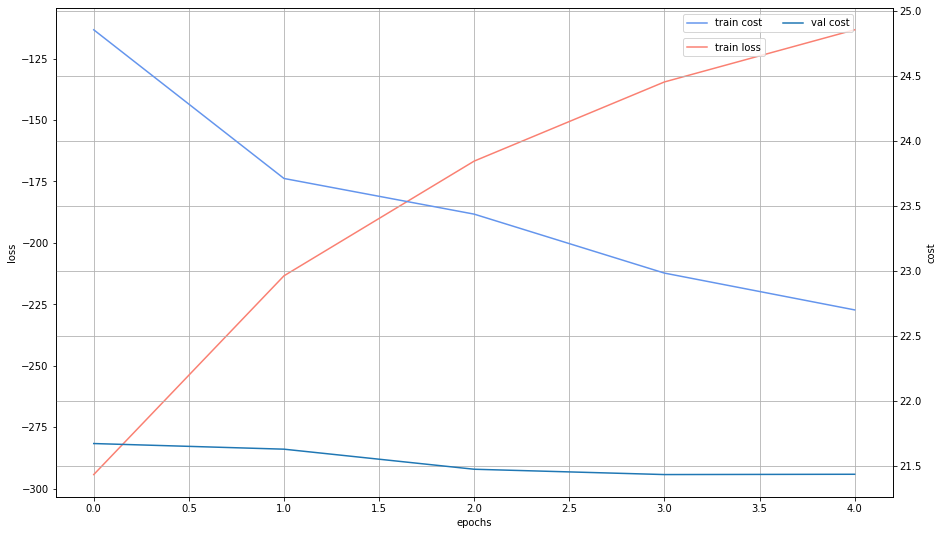

In [1]:
import tensorflow as tf
from time import gmtime, strftime

from attention_dynamic_model import set_decode_type
from reinforce_baseline import RolloutBaseline
from train import train_model

from utils import get_cur_time
from reinforce_baseline import load_tf_model
from utils import read_from_pickle


SAMPLES = 512 # 128*10000
BATCH = 128
LEARNING_RATE = 0.0001
ROLLOUT_SAMPLES = 10000
NUMBER_OF_WP_EPOCHS = 1
GRAD_NORM_CLIPPING = 1.0
BATCH_VERBOSE = 1000
VAL_BATCH_SIZE = 1000
VALIDATE_SET_SIZE = 10000
SEED = 1234
GRAPH_SIZE = 50
FILENAME = 'VRP_{}_{}'.format(GRAPH_SIZE, strftime("%Y-%m-%d", gmtime()))

START_EPOCH = 5
END_EPOCH = 10
FROM_CHECKPOINT = True
embedding_dim = 128
MODEL_PATH = 'model_checkpoint_epoch_4_VRP_50_2020-06-08.h5'
VAL_SET_PATH = 'Validation_dataset_VRP_50_2020-06-08.pkl'
BASELINE_MODEL_PATH = 'baseline_checkpoint_epoch_0_VRP_50_2020-06-08.h5'

# Initialize model
model_tf = load_tf_model(MODEL_PATH,
                         embedding_dim=embedding_dim,
                         graph_size=GRAPH_SIZE)
set_decode_type(model_tf, "sampling")
print(get_cur_time(), 'model loaded')

# Create and save validation dataset
validation_dataset = read_from_pickle(VAL_SET_PATH)
print(get_cur_time(), 'validation dataset loaded')

# Initialize optimizer
optimizer = tf.keras.optimizers.Adam(LEARNING_RATE)

# Initialize baseline
baseline = RolloutBaseline(model_tf,
                           wp_n_epochs = NUMBER_OF_WP_EPOCHS,
                           epoch = START_EPOCH,
                           num_samples=ROLLOUT_SAMPLES,
                           filename = FILENAME,
                           from_checkpoint = FROM_CHECKPOINT,
                           embedding_dim=embedding_dim,
                           graph_size=GRAPH_SIZE,
                           path_to_checkpoint = BASELINE_MODEL_PATH)
print(get_cur_time(), 'baseline initialized')

train_model(optimizer,
            model_tf,
            baseline,
            validation_dataset,
            samples = SAMPLES,
            batch = BATCH,
            val_batch_size = VAL_BATCH_SIZE,
            start_epoch = START_EPOCH,
            end_epoch = END_EPOCH,
            from_checkpoint = FROM_CHECKPOINT,
            grad_norm_clipping = GRAD_NORM_CLIPPING,
            batch_verbose = BATCH_VERBOSE,
            graph_size = GRAPH_SIZE,
            filename = FILENAME
            )